# Transformers embedding

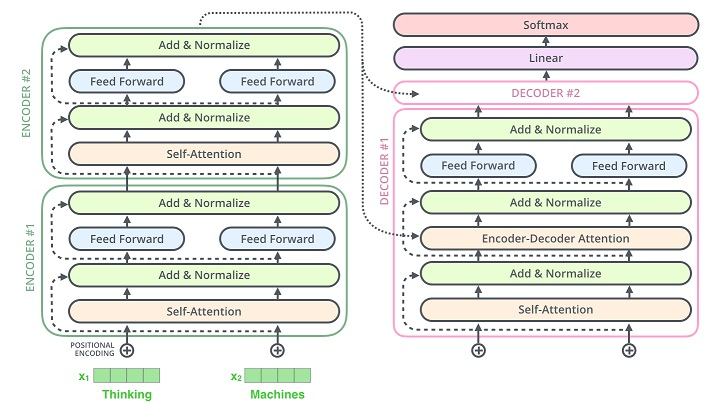

In [ ]:

from torch import nn

from models.embedding.positional_encoding import PositionalEncoding
from models.embedding.token_embeddings import TokenEmbedding


class TransformerEmbedding(nn.Module):
    """
    token embedding + positional encoding (sinusoid)
    positional encoding can give positional information to network
    """

    def __init__(self, vocab_size, d_model, max_len, drop_prob, device):
        """
        class for word embedding that included positional information

        :param vocab_size: size of vocabulary
        :param d_model: dimensions of model
        """
        super(TransformerEmbedding, self).__init__()
        self.tok_emb = TokenEmbedding(vocab_size, d_model)
        self.pos_emb = PositionalEncoding(d_model, max_len, device)
        self.drop_out = nn.Dropout(p=drop_prob)

    def forward(self, x):
        tok_emb = self.tok_emb(x)
        pos_emb = self.pos_emb(x)
        return self.drop_out(tok_emb + pos_emb)